In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from math import cos, sin, exp, sqrt
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.ticker as ticker
from scipy.integrate import simps
import re

import seaborn as sns
sns.set_style('darkgrid')

In [74]:
def springEquation(t):
        return 100 * exp( -(100/(2 * 70)) * t) * cos( sqrt( (10**4 / 70) - (100**2 / (4 * 70**2))) * t)

def getSolution(dt):
    t = np.arange(0, 5, dt)
    rx = np.vectorize(springEquation)(t)
    df = pd.DataFrame({"time": t, "rx": rx})
    return df.set_index("time")

def mse(A , B):
    return ((A - B)**2).mean()

def get_solver_name(path):
     stem = path.stem
     return stem.split("_")[0]

def get_simulation_data(df):
     times = df.index
     dt = times[1] - times[0]
     return {
          "df": df,
          "dt": dt
     }

In [100]:
BASE_PATH = '../tp4/out/spring/csv/'
euler = pd.read_csv(f"{BASE_PATH}/EulerSimpleSolver_dt1.0e-04.csv", index_col="time", delimiter=",")
verlet = pd.read_csv(f"{BASE_PATH}/VerletOriginalSolver_dt1.0e-04.csv", index_col="time", delimiter=",")
beeman = pd.read_csv(f"{BASE_PATH}/BeemanSolver_dt1.0e-04.csv", index_col="time", delimiter=",")
solution = getSolution(1e-4)
solvers = [euler, verlet, beeman]

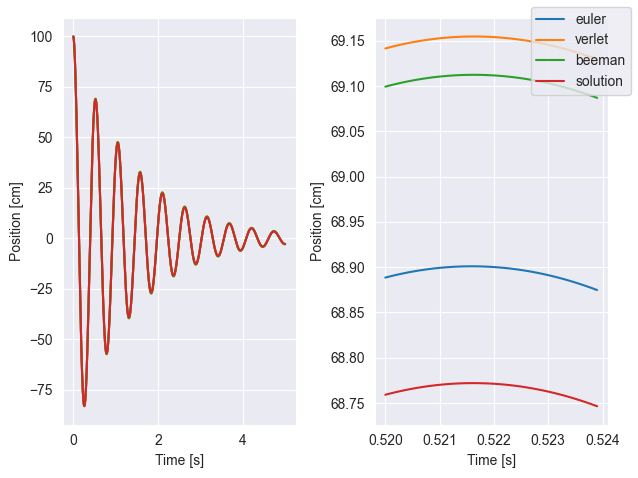

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(euler["rx"], label="euler")
ax1.plot(verlet["rx"], label="verlet")
ax1.plot(beeman["rx"], label="beeman")
ax1.plot(solution["rx"], label="solution")
ax1.set_ylabel("Position [cm]")
ax1.set_xlabel("Time [s]")
fig.legend()

zr = np.arange(5200, 5240)
ax2.plot(euler["rx"].iloc[zr], label="euler")
ax2.plot(verlet["rx"].iloc[zr], label="verlet")
ax2.plot(beeman["rx"].iloc[zr], label="beeman")
ax2.plot(solution["rx"].iloc[zr], label="solution")
ax2.set_ylabel("Position [cm]")
ax2.set_xlabel("Time [s]")

fig.tight_layout()

Text(0.5, 0, 'Integral Solver')

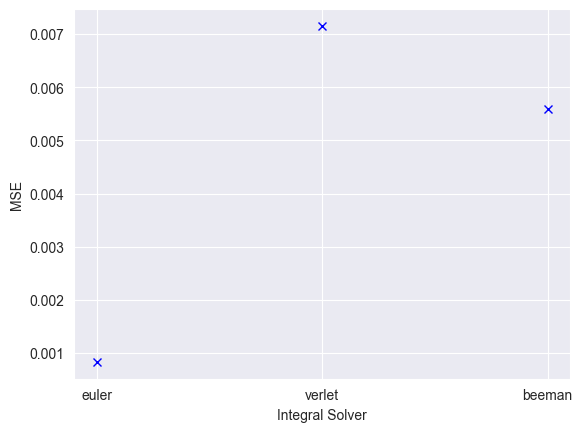

In [106]:
errors = [mse(solver["rx"], solution["rx"]) for solver in solvers]

fig, ax = plt.subplots()
ax.plot(["euler", "verlet", "beeman"], errors, "xb")
ax.set_ylabel("MSE")
ax.set_xlabel("Integral Solver")